['Phishing Email' 'Safe Email']


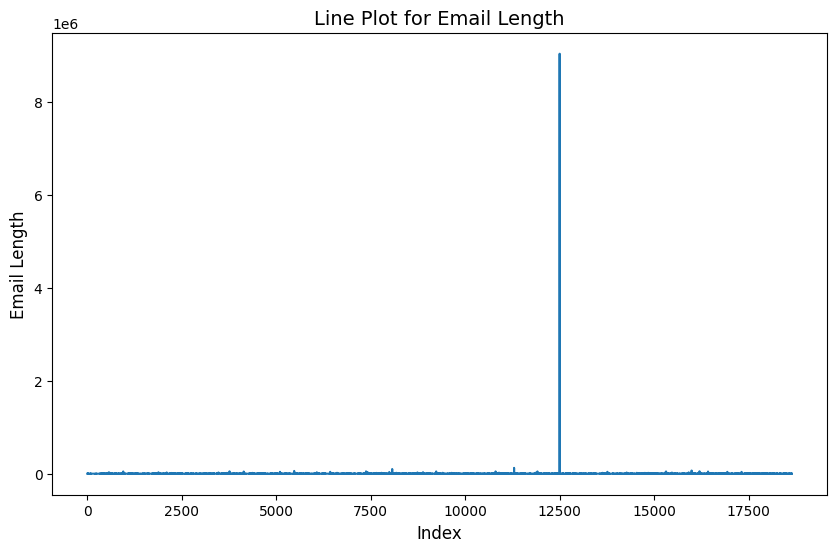

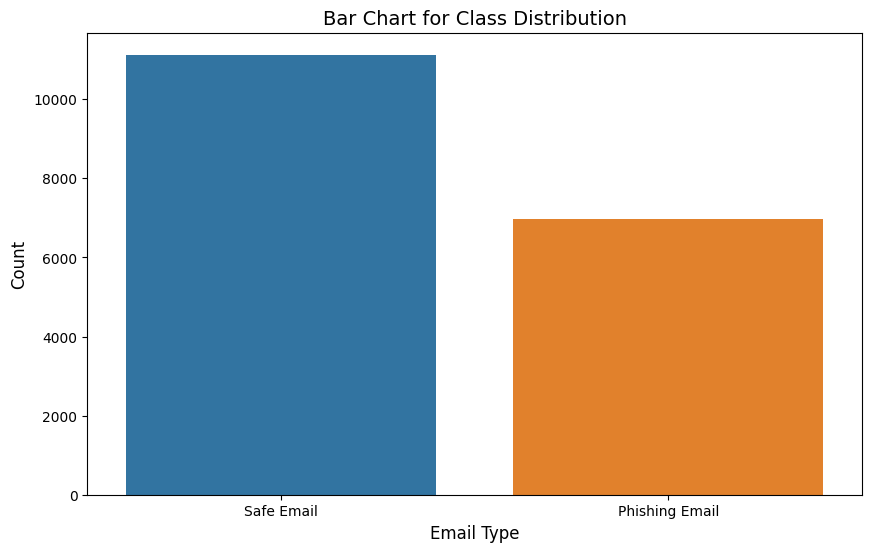

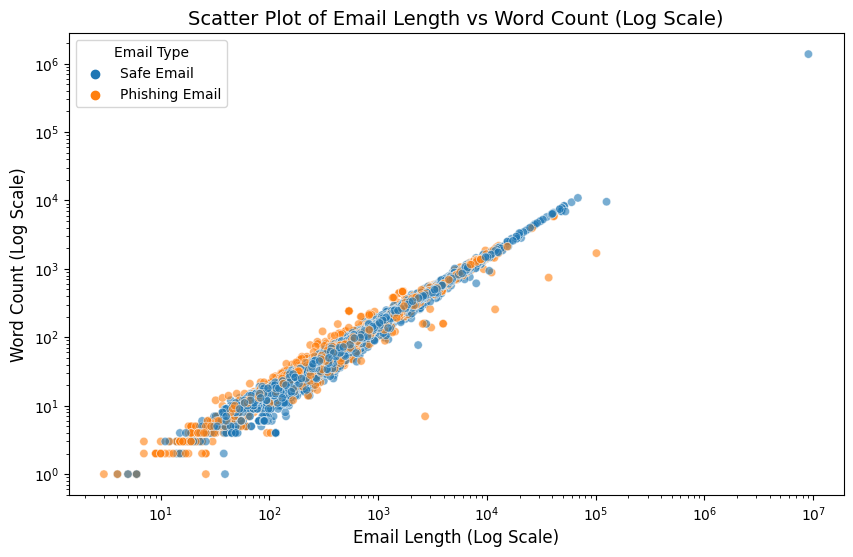

Accuracy of Stacking ensemble: 97.92%
True Positive: 2754
True Negative: 1677
False Positive: 44
False Negative: 50
Precision: 98.43%
Recall: 98.22%
F1 Score: 98.32%


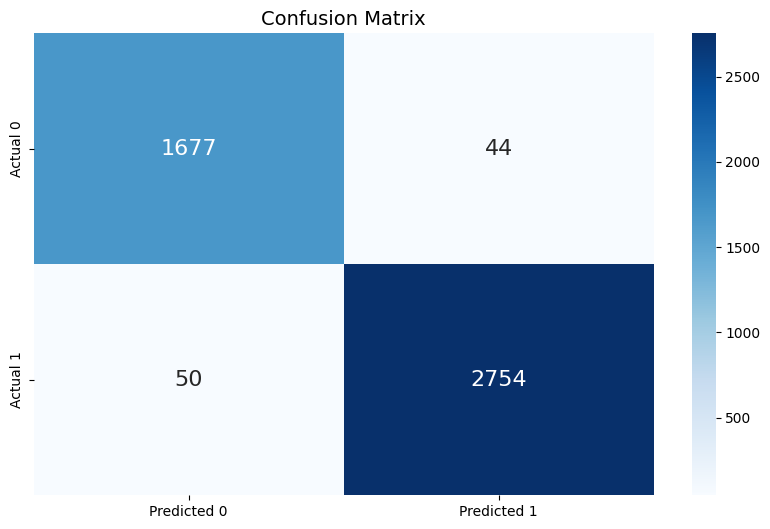

In [ ]:
# Importing necessary libraries
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load the phishing email data from the specified file path
file_path = "/content/Phishing_Email.csv"
data = pd.read_csv(file_path)

# Removing rows with missing values in 'Email Text' and 'Email Type' columns
data.dropna(subset=['Email Text', 'Email Type'], inplace=True)

# Function to clean email text: lowercase, remove punctuation, remove stopwords, and stem words
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)  # Remove stopwords
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())  # Apply stemming
    return text

# Applying the text cleaning function to the email text in the dataset
data['Email Text'] = data['Email Text'].apply(clean_text)

# Removing rows with empty 'Email Text' after cleaning
data = data[data['Email Text'].notna() & (data['Email Text'].str.strip() != '')]

# Using TF-IDF to convert email text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = vectorizer.fit_transform(data['Email Text']).toarray()

# Encoding the email types (labels) into numerical format
encoder = LabelEncoder()
y = encoder.fit_transform(data['Email Type'])

# Adding two new columns for email length and word count for visualization purposes
data['Email Length'] = data['Email Text'].apply(len)
data['Word Count'] = data['Email Text'].apply(lambda x: len(x.split()))

# Displaying the classes found by the label encoder
print(encoder.classes_)

# Visualizing the length of emails using a line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Email Length'])
plt.title('Line Plot for Email Length', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Email Length', fontsize=12)
plt.show()

# Visualizing the distribution of email types using a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Email Type', data=data)
plt.title('Bar Chart for Class Distribution', fontsize=14)
plt.xlabel('Email Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Scatter plot for Email Length vs Word Count with logarithmic scale
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Email Length', y='Word Count', hue='Email Type', data=data, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter Plot of Email Length vs Word Count (Log Scale)', fontsize=14)
plt.xlabel('Email Length (Log Scale)', fontsize=12)
plt.ylabel('Word Count (Log Scale)', fontsize=12)
plt.legend(title='Email Type', fontsize=10)
plt.show()

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Defining base learners for the stacking classifier
svm = SVC(probability=True, kernel='linear', cache_size=7000)  # Support Vector Machine
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost Classifier

# Stacking classifier combining SVM and XGBoost, with Logistic Regression as final estimator
stacking_clf = StackingClassifier(estimators=[('svm', svm), ('xgb', xgb)], final_estimator=LogisticRegression())

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

# Making predictions with the stacking classifier
stacking_preds = stacking_clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, stacking_preds)
print(f"Accuracy of Stacking ensemble: {accuracy*100:.2f}%")

# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, stacking_preds)
tn, fp, fn, tp = conf_matrix.ravel()
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, stacking_preds)
print(f'Precision: {precision*100:.2f}%')
recall = recall_score(y_test, stacking_preds)
print(f'Recall: {recall*100:.2f}%')
f1 = f1_score(y_test, stacking_preds)
print(f'F1 Score: {f1*100:.2f}%')

# Visualizing the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14)
plt.show()



Accuracy of SVM: 96.69%
True Positive: 2658
True Negative: 1847
False Positive: 40
False Negative: 114
Precision: 98.52%
Recall: 95.89%
F1 Score: 97.18%


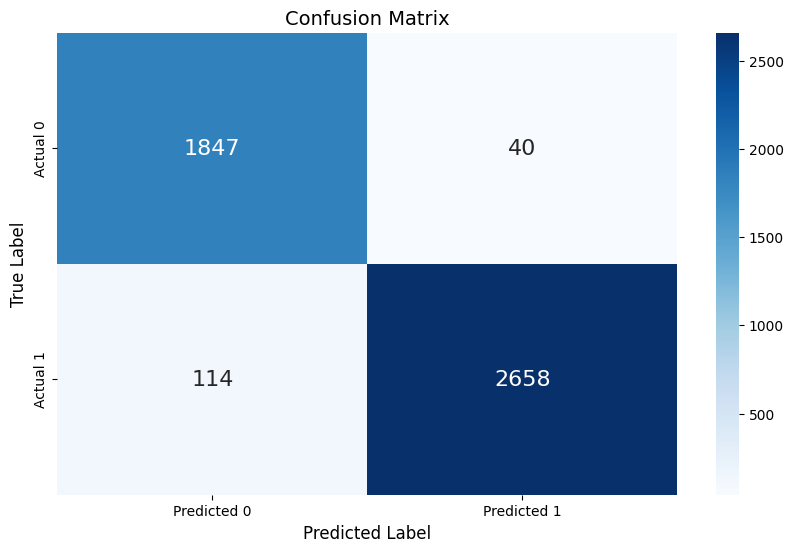

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load the data
file_path = "/content/Phishing_Email.csv"
data = pd.read_csv(file_path)

# Handling Missing Values
data.dropna(subset=['Email Text', 'Email Type'], inplace=True)

# Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)  # Remove stopwords
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())  # Stemming
    return text

# Apply text cleaning
data['Cleaned Email Text'] = data['Email Text'].apply(clean_text)

# Feature Engineering using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = vectorizer.fit_transform(data['Cleaned Email Text']).toarray()

# Label Encoding for the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(data['Email Type'])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SVM Classifier
svm = SVC(probability=True, kernel='linear', cache_size=7000, shrinking=True)

# Fit the SVM classifier
svm.fit(X_train, y_train)

# Predicting with SVM
svm_preds = svm.predict(X_test)

# Accuracy of the SVM
accuracy = accuracy_score(y_test, svm_preds)
print(f"Accuracy of SVM: {accuracy*100:.2f}%")

# Confusion Matrix and other metrics
conf_matrix = confusion_matrix(y_test, svm_preds)
tn, fp, fn, tp = conf_matrix.ravel()

# Printing TP, TN, FP, FN
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# Precision, Recall, and F1 Score
precision = precision_score(y_test, svm_preds)
recall = recall_score(y_test, svm_preds)
f1 = f1_score(y_test, svm_preds)
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

# Displaying confusion matrix with larger text
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


Accuracy of XGBoost: 97.13%
True Positive: 2726
True Negative: 1669
False Positive: 52
False Negative: 78
Precision: 98.13%
Recall: 97.22%
F1 Score: 97.67%


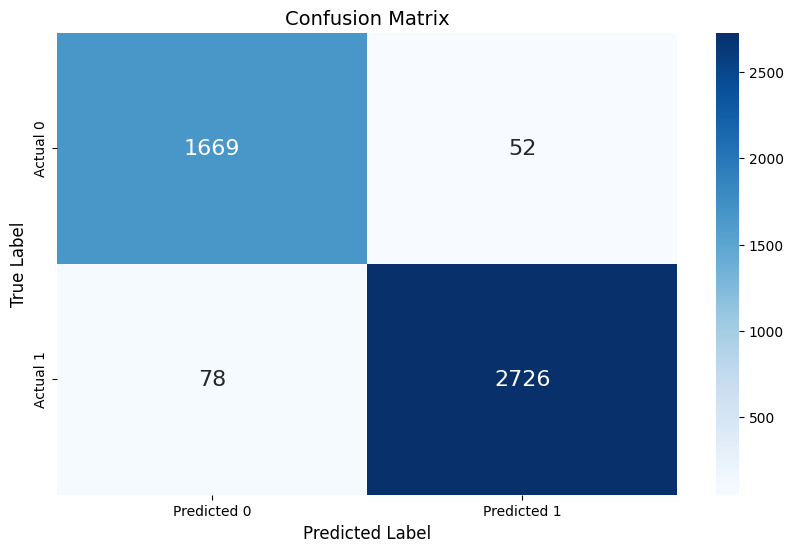

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load the data
file_path = "/content/Phishing_Email.csv"
data = pd.read_csv(file_path)

# Handling Missing Values
data.dropna(subset=['Email Text', 'Email Type'], inplace=True)

# Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    return text

# Apply text cleaning
data['Cleaned Email Text'] = data['Email Text'].apply(clean_text)

# Drop rows with null values or empty blanks in text of 'Cleaned Email Text', post-cleaning
data = data[data['Cleaned Email Text'].notna() & (data['Cleaned Email Text'].str.strip() != '')]

# Feature Engineering using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Cleaned Email Text']).toarray()

# Label Encoding for the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(data['Email Type'])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# XGBoost Classifier
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the XGBoost classifier
xgboost.fit(X_train, y_train)

# Predicting with XGBoost
xgboost_preds = xgboost.predict(X_test)

# Accuracy of the XGBoost
accuracy = accuracy_score(y_test, xgboost_preds)
print(f"Accuracy of XGBoost: {accuracy*100:.2f}%")

# Confusion Matrix and other metrics
conf_matrix = confusion_matrix(y_test, xgboost_preds)
tn, fp, fn, tp = conf_matrix.ravel()

# Printing TP, TN, FP, FN
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# Precision, Recall, and F1 Score
precision = precision_score(y_test, xgboost_preds)
recall = recall_score(y_test, xgboost_preds)
f1 = f1_score(y_test, xgboost_preds)
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

# Displaying confusion matrix with larger text
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()



Accuracy of Random Forest: 97.22%
True Positive: 2733
True Negative: 1666
False Positive: 55
False Negative: 71
Precision: 98.03%
Recall: 97.47%
F1 Score: 97.75%


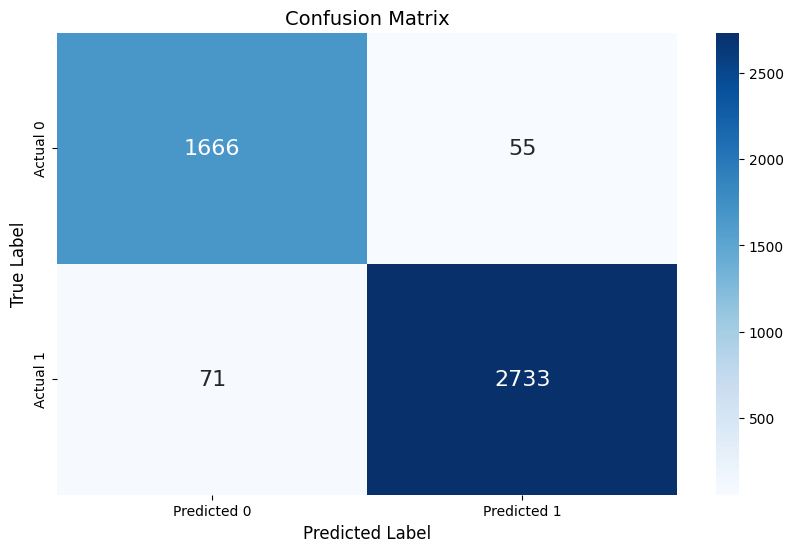

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load the data
file_path = "/content/Phishing_Email.csv"  # Removed the raw string notation for consistency
data = pd.read_csv(file_path)

# Handling Missing Values
data.dropna(subset=['Email Text', 'Email Type'], inplace=True)

# Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    return text

# Apply text cleaning
data['Cleaned Email Text'] = data['Email Text'].apply(clean_text)

# Drop rows with null values or empty blanks in text of 'Cleaned Email Text', post-cleaning
data = data[data['Cleaned Email Text'].notna() & (data['Cleaned Email Text'].str.strip() != '')]

# Feature Engineering using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Cleaned Email Text']).toarray()

# Label Encoding for the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(data['Email Type'])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)

# Fit the Random Forest classifier
random_forest.fit(X_train, y_train)

# Predicting with Random Forest
rf_preds = random_forest.predict(X_test)

# Accuracy of the Random Forest
accuracy = accuracy_score(y_test, rf_preds)
print(f"Accuracy of Random Forest: {accuracy*100:.2f}%")

# Confusion Matrix and other metrics
conf_matrix = confusion_matrix(y_test, rf_preds)
tn, fp, fn, tp = conf_matrix.ravel()

# Printing TP, TN, FP, FN
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# Precision, Recall, and F1 Score
precision = precision_score(y_test, rf_preds)
recall = recall_score(y_test, rf_preds)
f1 = f1_score(y_test, rf_preds)
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

# Displaying confusion matrix with larger text
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()



Accuracy of Naive Bayes: 96.22%
True Positive: 2730
True Negative: 1624
False Positive: 97
False Negative: 74
Precision: 96.57%
Recall: 97.36%
F1 Score: 96.96%


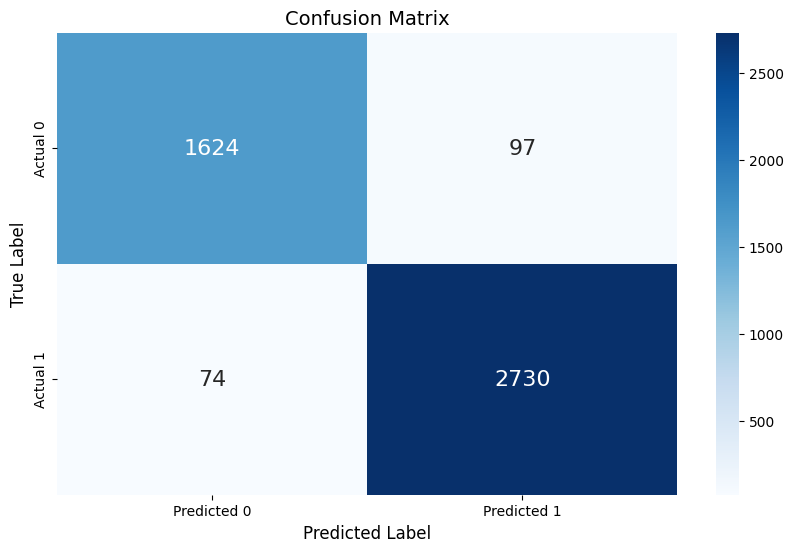

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load the data
file_path = "/content/Phishing_Email.csv"
data = pd.read_csv(file_path)

# Handling Missing Values
data.dropna(subset=['Email Text', 'Email Type'], inplace=True)

# Text Cleaning Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    return text

# Apply text cleaning
data['Cleaned Email Text'] = data['Email Text'].apply(clean_text)

# Drop rows with null values or empty blanks in text of 'Cleaned Email Text', post-cleaning
data = data[data['Cleaned Email Text'].notna() & (data['Cleaned Email Text'].str.strip() != '')]

# Feature Engineering using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Cleaned Email Text']).toarray()

# Label Encoding for the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(data['Email Type'])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Naive Bayes Classifier
naive_bayes = MultinomialNB()

# Fit the Naive Bayes classifier
naive_bayes.fit(X_train, y_train)

# Predicting with Naive Bayes
nb_preds = naive_bayes.predict(X_test)

# Accuracy of the Naive Bayes
accuracy = accuracy_score(y_test, nb_preds)
print(f"Accuracy of Naive Bayes: {accuracy*100:.2f}%")

# Confusion Matrix and other metrics
conf_matrix = confusion_matrix(y_test, nb_preds)
tn, fp, fn, tp = conf_matrix.ravel()

# Printing TP, TN, FP, FN
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# Precision, Recall, and F1 Score
precision = precision_score(y_test, nb_preds)
recall = recall_score(y_test, nb_preds)
f1 = f1_score(y_test, nb_preds)
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

# Displaying confusion matrix with larger text
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()
